In [13]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import linalg as la

In [14]:
def model(x, truth_beta):
    return truth_beta[0]*np.exp(x/truth_beta[1])


def Fval(x, y, beta):
    return model(x, beta) - y


def Jac(x, beta):
    return np.array([np.exp(x/beta[1]), -(beta[0]/beta[1]**2)*np.exp(x/beta[1])*x])

In [15]:
beta_truth = [0.15, 3.75]
x_train = np.linspace(0, 10, num=100)
y_train = model(x_train, beta_truth) + np.random.normal(0, 0.1, size=len(x_train))

Iteration:  0 -- Error: 5.5684e+05
Iteration:  1 -- Error: 1.1090e+04
Iteration:  2 -- Error: 2.1033e+03
Iteration:  3 -- Error: 3.5329e+02
Iteration:  4 -- Error: 6.1458e+01
Iteration:  5 -- Error: 7.5025e+00
Iteration:  6 -- Error: 1.6482e-01
Iteration:  7 -- Error: 5.2246e-05
Iteration:  8 -- Error: 2.8330e-08
Iteration:  9 -- Error: 1.8213e-10
Iteration: 10 -- Error: 1.1845e-12
Iteration: 11 -- Error: 8.7052e-15
>>> Convergence achieved!

Parameters: [0.16154853 3.88353835] 
Error:  8.705168045924987e-15 
Number of Iterations:  11


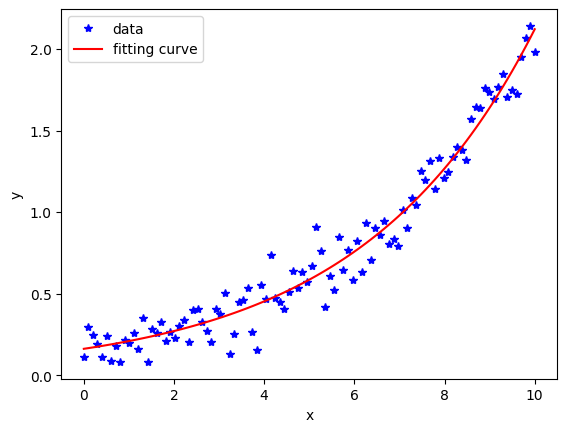

In [19]:
# Damped Gauss-Newton Method
def GN_naive_linesearch(Fx, Jac, x, y, beta0, stepsize=1, maxiter=100, tol=1e-3):
    beta = beta0
    err = 0
    t = 0
    while t < maxiter:
        Ft = Fx(x, y, beta)
        Jt = Jac(x, beta)
        St = la.pinv(Jt.dot(Jt.T))
        yt = Jt.dot(Ft).T
        dt = np.ravel(St.dot(yt))
        err = la.norm(yt)

        # Naive Line Search
        current_stepsize = stepsize
        while True:
            next_bet = beta - current_stepsize * dt
            next_Ft = Fx(x, y, next_bet)
            if la.norm(next_Ft) <= la.norm(Ft):
                break
            print("Line Search")
            current_stepsize /= 2
            
        beta = next_bet
        print("Iteration: {0:2d}".format(t), "-- Error: {0:5.4e}".format(err))
        if err <= tol:
            print(">>> Convergence achieved!")
            break
        t += 1
    return beta, err, t


# We run it.
beta0 = [1, 2]
beta_best, err, n_it = GN_naive_linesearch(
    Fval, Jac, x_train, y_train, beta0=beta0, maxiter=1000, tol=1e-12)
print("\nParameters:", beta_best, "\nError: ",
      err, "\nNumber of Iterations: ", n_it)

# Plotting
plt.plot(x_train, y_train, 'b*', label='data')
plt.plot(x_train, model(x_train, beta_best), "-r", label="fitting curve")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()